In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
df.shape

(550068, 12)

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array([0, 1])

In [13]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [14]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [16]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [17]:
df.rename(columns={'City_Category':'City','Stay_In_Current_City_Year':'Current_City','Product_Category_1':'Prod_1','Product_Category_2':'Prod_2','Product_Category_3':'Prod_3'},inplace=True)

In [18]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [19]:
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [20]:
df

,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Prod_1,Prod_2,Prod_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,0,55+,1,C,2,0,20,NaN,NaN,365


In [21]:
df.dtypes

Gender                          int64
Age                            object
Occupation                      int64
City                           object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Prod_1                          int64
Prod_2                        float64
Prod_3                        float64
Purchase                        int64
dtype: object

In [22]:
df.Age.values

array(['0-17', '0-17', '0-17', ..., '26-35', '55+', '46-50'], dtype=object)

In [23]:
df['Age'].replace({'0-17':'child','18-25':'teenage','26-35':' young adults','36-45':'adults','46-50':'mid age','51-55':'old adults','55+':'old'},inplace=True)

In [24]:
df

,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Prod_1,Prod_2,Prod_3,Purchase
0,0,child,10,A,2,0,3,NaN,NaN,8370
1,0,child,10,A,2,0,1,6.0,14.0,15200
2,0,child,10,A,2,0,12,NaN,NaN,1422
3,0,child,10,A,2,0,12,14.0,NaN,1057
4,1,old,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,old adults,13,B,1,1,20,NaN,NaN,368
550064,0,young adults,1,C,3,0,20,NaN,NaN,371
550065,0,young adults,15,B,4+,1,20,NaN,NaN,137
550066,0,old,1,C,2,0,20,NaN,NaN,365


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Purchase Distribution

/tmp/ipykernel_20/352269465.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Purchase'])


Text(0.5, 1.0, 'Distribution')

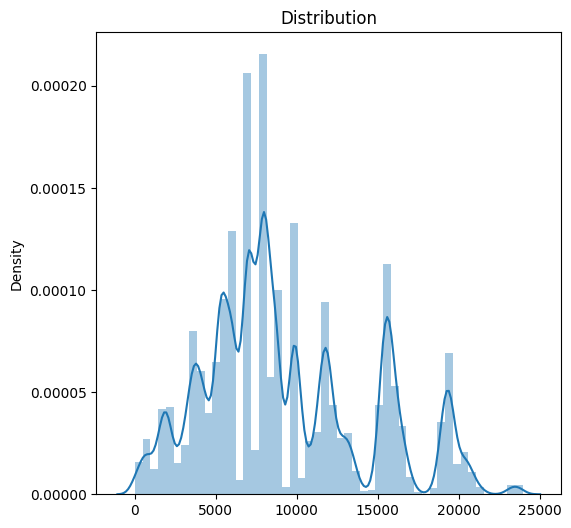

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
sns.distplot(x=df['Purchase'])
axes.set_title('Distribution')

Fill NaN Values

In [28]:
df['Prod_2']=df['Prod_2'].replace(np.NaN,df['Prod_2'].mean())

In [29]:
df['Prod_3']=df['Prod_3'].replace(np.NaN,df['Prod_3'].mean())

In [30]:
df

,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Prod_1,Prod_2,Prod_3,Purchase
0,0,child,10,A,2,0,3,9.842329,12.668243,8370
1,0,child,10,A,2,0,1,6.000000,14.000000,15200
2,0,child,10,A,2,0,12,9.842329,12.668243,1422
3,0,child,10,A,2,0,12,14.000000,12.668243,1057
4,1,old,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,old adults,13,B,1,1,20,9.842329,12.668243,368
550064,0,young adults,1,C,3,0,20,9.842329,12.668243,371
550065,0,young adults,15,B,4+,1,20,9.842329,12.668243,137
550066,0,old,1,C,2,0,20,9.842329,12.668243,365


Check for Outliners

<Axes: xlabel='Prod_1'>

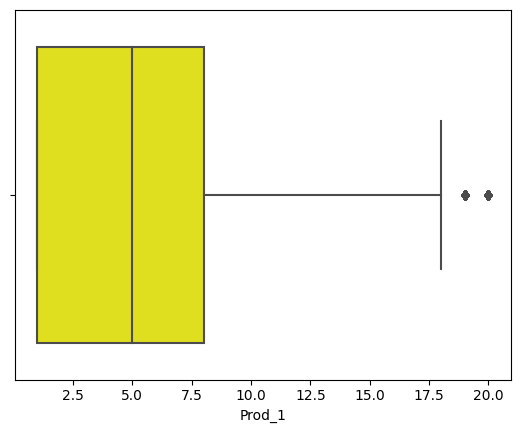

In [31]:
sns.boxplot(data=df,x=df['Prod_1'],color='yellow')

<Axes: xlabel='Prod_2'>

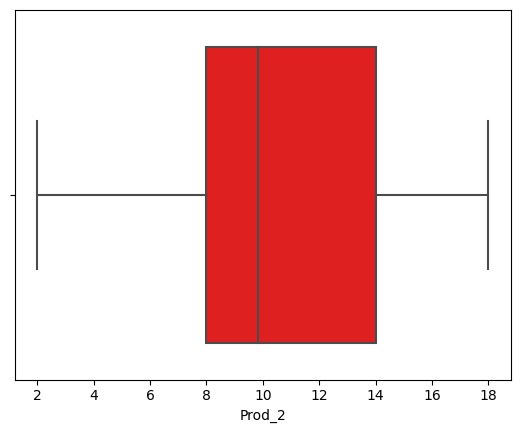

In [32]:
sns.boxplot(data=df,x=df['Prod_2'],color='red')

<Axes: xlabel='Prod_3'>

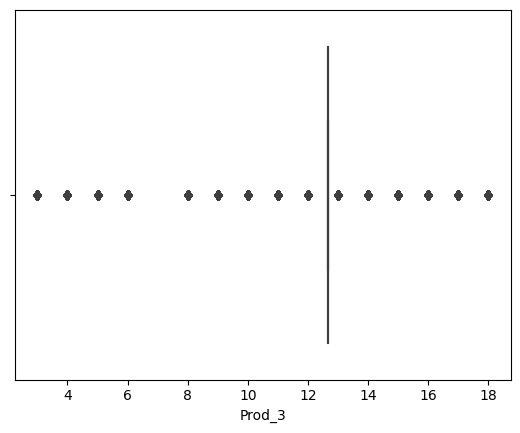

In [33]:
sns.boxplot(data=df,x=df['Prod_3'])

<Axes: xlabel='Age', ylabel='Purchase'>

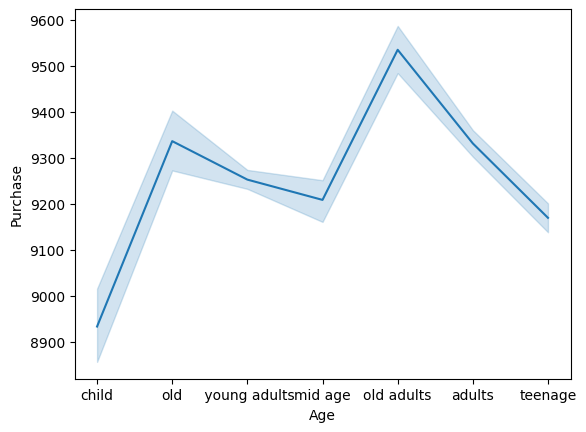

In [34]:
sns.lineplot(x=df['Age'],y=df['Purchase'],data=df)

<Axes: xlabel='City', ylabel='Purchase'>

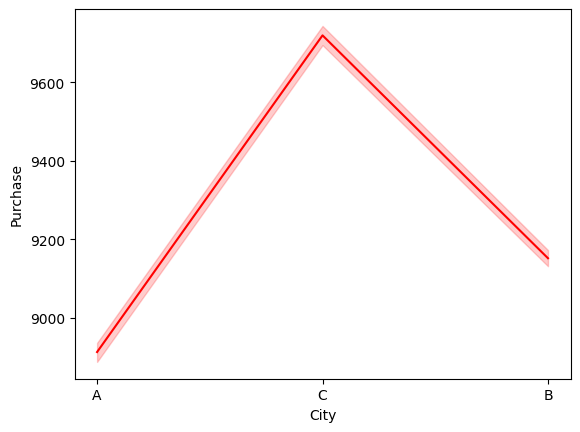

In [35]:
sns.lineplot(x=df['City'],y=df['Purchase'],data=df,color='red')

<Axes: xlabel='Occupation', ylabel='Purchase'>

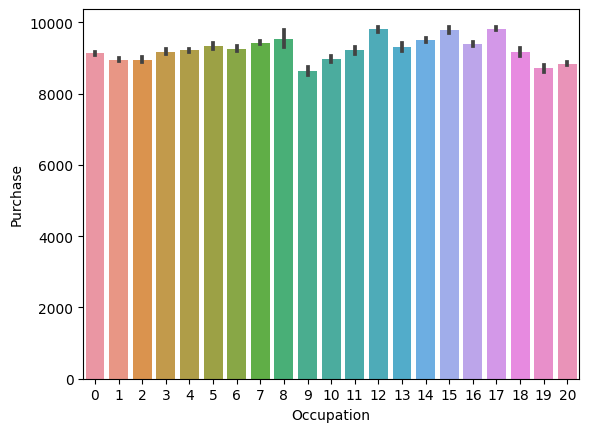

In [36]:
sns.barplot(x=df['Occupation'],y=df['Purchase'],data=df)

From above we can say that Occupation of 12,15,17 has highest purchasing capacity.

<!-- Product_category_1 vs Purchased -->

Product_category_1 vs Purchased

<function matplotlib.pyplot.show(close=None, block=None)>

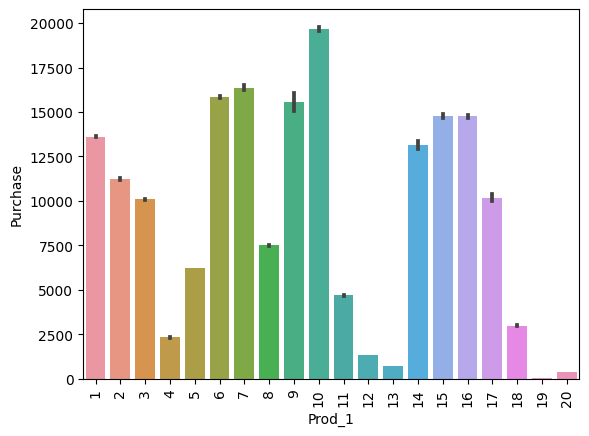

In [37]:
sns.barplot(x=df['Prod_1'],y=df['Purchase'],data=df)
plt.xticks(rotation=90)
plt.show

Product_category_2 vs Purchased

<function matplotlib.pyplot.show(close=None, block=None)>

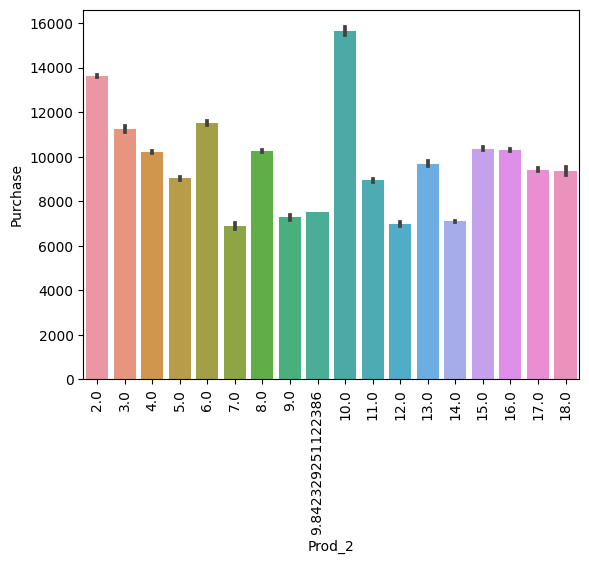

In [38]:
sns.barplot(x=df['Prod_2'],y=df['Purchase'],data=df)
plt.xticks(rotation=90)
plt.show

Product_category_3 vs Purchased

<function matplotlib.pyplot.show(close=None, block=None)>

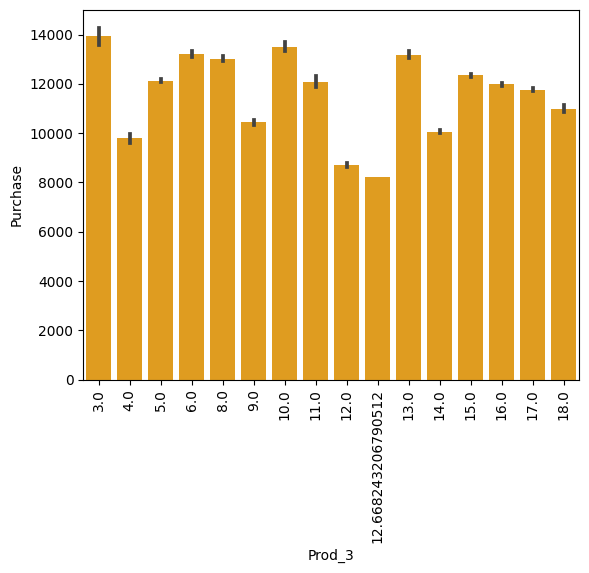

In [39]:
sns.barplot(x=df['Prod_3'],y=df['Purchase'],data=df,color='orange')
plt.xticks(rotation=90)
plt.show

City category pie chart

<Axes: ylabel='count'>

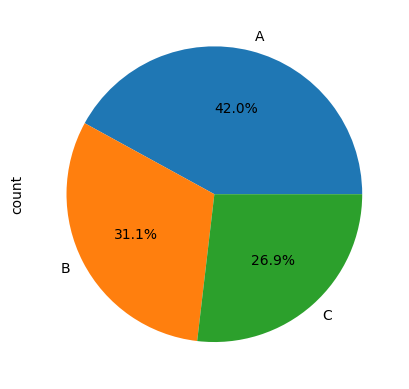

In [40]:
df['City'].value_counts().plot.pie(autopct='%1.1f%%',labels=['A','B','C'])